In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [2]:
year_start = 1200
# year_end = 1400

avg_temp_df = pd.read_csv('/Users/jingli/Desktop/SF2943-Time-Series-Analysis/data/GlobalTemperatures.csv')
avg_temp_df = avg_temp_df.loc[year_start:, ['dt', 'LandAverageTemperature']]
avg_temp_df.columns = avg_temp_df.columns.str.replace('dt', 'Date') # Rename dt to 'Date'
print(avg_temp_df)

            Date  LandAverageTemperature
1200  1850-01-01                   0.749
1201  1850-02-01                   3.071
1202  1850-03-01                   4.954
1203  1850-04-01                   7.217
1204  1850-05-01                  10.004
...          ...                     ...
3187  2015-08-01                  14.755
3188  2015-09-01                  12.999
3189  2015-10-01                  10.801
3190  2015-11-01                   7.433
3191  2015-12-01                   5.518

[1992 rows x 2 columns]


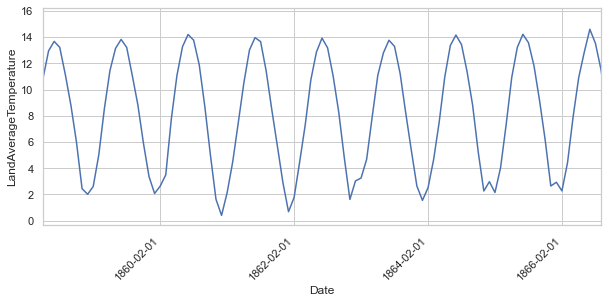

In [3]:
INTERVALS = 12*2 # Determine how often to show x-axis label
X_START = 100
X_END = 200

# Visaulization taken from: https://stackoverflow.com/questions/64052747/plot-with-seaborn-not-show-all-in-x-axis
sns.set(rc={"figure.figsize": (10, 4)})
sns.set_style("whitegrid")
line_plot = sns.lineplot(data=avg_temp_df, x="Date", y="LandAverageTemperature")
line_plot.set(xlim=(X_START, X_END))
locator = mdates.DayLocator(interval=INTERVALS)
line_plot.xaxis.set_major_locator(locator)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')
line_plot.figure.savefig('time_serie_plot')


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
print(avg_temp_df)
import statsmodels.api as sm
#avg_temp_df['Date'] = pd.to_datetime(avg_temp_df['Date'])
avg_temp_df.Date = pd.to_datetime(avg_temp_df.Date)
avg_temp_df.set_index('Date',inplace=True)
print(avg_temp_df)

            Date  LandAverageTemperature
1200  1850-01-01                   0.749
1201  1850-02-01                   3.071
1202  1850-03-01                   4.954
1203  1850-04-01                   7.217
1204  1850-05-01                  10.004
...          ...                     ...
3187  2015-08-01                  14.755
3188  2015-09-01                  12.999
3189  2015-10-01                  10.801
3190  2015-11-01                   7.433
3191  2015-12-01                   5.518

[1992 rows x 2 columns]
            LandAverageTemperature
Date                              
1850-01-01                   0.749
1850-02-01                   3.071
1850-03-01                   4.954
1850-04-01                   7.217
1850-05-01                  10.004
...                            ...
2015-08-01                  14.755
2015-09-01                  12.999
2015-10-01                  10.801
2015-11-01                   7.433
2015-12-01                   5.518

[1992 rows x 1 columns]


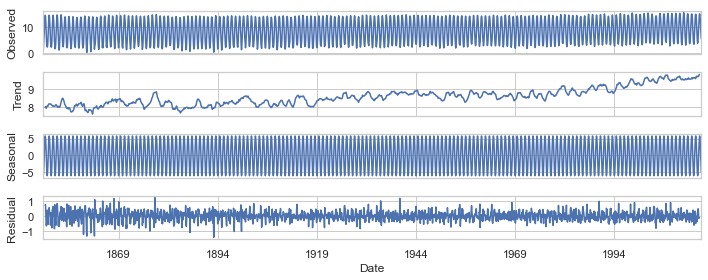

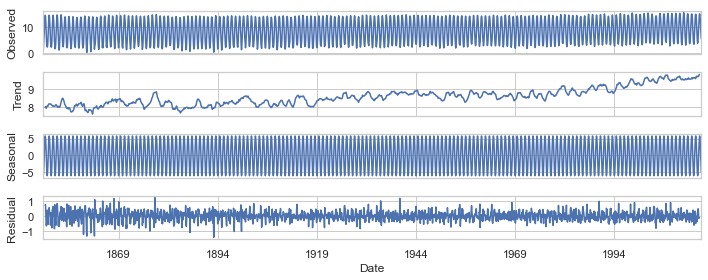

In [13]:
decompose_result = seasonal_decompose(avg_temp_df.LandAverageTemperature.interpolate(), freq=12, model='additive')
decompose_result.plot()
#print(decompose_result.trend)
#print(decompose_result.seasonal)
#print(decompose_result.resid)